In [3]:
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import preprocessing
import scipy.stats as stats
from statistics import mean,stdev
from statsmodels.graphics.gofplots import qqplot
import math
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

In [4]:
data = pd.read_csv('cleanDataset.csv')

In [5]:
data.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,250,kleinwagen,1996,manuell,44.0,150000,3,benzin,volkswagen,nein
1,9500,cabrio,2017,automatik,193.0,150000,3,benzin,mercedes_benz,nein
2,6077,kombi,1998,manuell,115.0,150000,2,diesel,volvo,nein
3,1750,kleinwagen,2002,manuell,75.0,125000,1,benzin,opel,nein
4,790,kleinwagen,1997,manuell,60.0,150000,6,benzin,volkswagen,nein


In [45]:
def estimate_coef(x, y): 
    n = 750
  
    m_x, m_y = x.mean(), y.mean()
  
    numa =  sum(y*x) - n*m_y*m_x 
    numb = sum(x*x) - n*m_x*m_x
  
    b_1 = numa / numb 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 

def plot_regression_line(x, y, b_0,b_1): 
    plt.scatter(x, y, color = "b", 
               marker = "o", s = 30) 
  
    y_pred = b_0 + b_1*x 
  
    plt.plot(x, y_pred, color = "r") 
    plt.xlabel('Power per stroke') 
    plt.ylabel('Price') 
  
    plt.show() 

In [46]:
from sklearn import preprocessing
x = data[['powerPS']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
norm_PPS = pd.DataFrame(x_scaled)

y = data[['price']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
y_scaled = min_max_scaler.fit_transform(y)

# Run the normalizer on the dataframe
norm_price = pd.DataFrame(y_scaled)

Text(0, 0.5, 'Price')

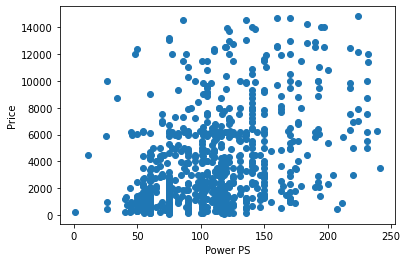

In [47]:
# Scatterplot to visualise

import matplotlib.pyplot as plt
plt.scatter(data["powerPS"], data["price"])
plt.xlabel("Power PS")
plt.ylabel("Price")

In [48]:
# Estimate the linear regression parameters using the normalised powerPS and price

a,b = estimate_coef(norm_PPS[0], norm_price[0])
a,b

(0.026326684076787565, 0.5274069701710811)

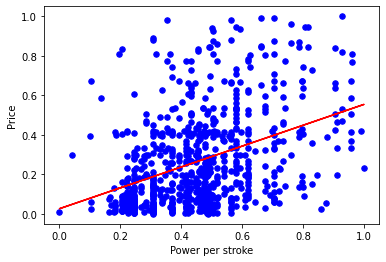

In [49]:
# Plotting the regression line

plot_regression_line (norm_PPS[0], norm_price[0], a, b)

In [50]:
from scipy.stats import pearsonr
# Null hypothesis (H0): powerPS and price are independent.
# Alternate hypothesis (H1): powerPS and price dependent.
data1 = data.powerPS
data2 = data.price
stat, p = pearsonr(data1, data2)
print('stat = ',stat,', p = ',p)
if p > 0.05:
    print('Failed to reject H0')
else:
    print('Reject H0')


stat =  0.3897261996183004 , p =  1.2962658915998578e-28
Reject H0


In [51]:
# Calculating the correlation (Pearson's) between price and the power per stroke

corr, _ = pearsonr(data.price, data.powerPS)
corr

0.3897261996183004